<h1 align = 'center'> Feature Engineering</h1>

<font color='Red'> __Feature Scaling__ </font>

- Feature Scaling is Technique to standardies the independant features present in the data in a fixed range
- Types of Features Scaling 
    - Standardization
    - Normalization 
        - MinMax Scalar
        - Robust Scalar

<font color='blue'>Standardization </font>

- Also called Z-Score Normalization
- Standaization Mean=0, SD= 1
- 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 df= pd.read_csv('Data.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
df=df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
371,60.0,83000.0,1
48,30.0,135000.0,1
98,35.0,73000.0,0
349,38.0,61000.0,0
321,53.0,82000.0,1


#### 1. Train test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
## X Value
X=df.drop('Purchased', axis=1)
X

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [8]:
y=df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [10]:
df.shape, X_train.shape, X_test.shape

((400, 3), (268, 2), (132, 2))

#### 2. StandardScalar

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scalar=StandardScaler()

In [13]:
# Fit the scalar to the train set, it eill learn the parameters
scalar.fit(X_train)

StandardScaler()

In [14]:
scalar.mean_

array([3.77313433e+01, 6.94216418e+04])

In [15]:
X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [16]:
X_train_scaled

array([[-1.35429864, -1.48144728],
       [ 0.42101023,  2.33810598],
       [ 0.81552331,  0.7809035 ],
       [-0.95978556, -0.30620012],
       [ 0.12512542,  0.7809035 ],
       [-0.95978556,  0.57523525],
       [ 0.32238196,  0.0757552 ],
       [ 0.71689504, -1.27577903],
       [-0.46664421, -0.01238833],
       [-1.74881173,  0.36956699],
       [-0.66390075,  0.13451756],
       [ 0.42101023,  0.31080464],
       [-0.26938767,  0.0757552 ],
       [-0.46664421,  2.33810598],
       [ 0.22375369,  0.04637403],
       [ 1.30866467,  2.24996245],
       [ 0.81552331,  0.28142346],
       [-0.26938767,  0.16389874],
       [ 0.02649715, -0.54124955],
       [-0.17075939,  0.16389874],
       [-0.07213112,  0.25204228],
       [ 0.02649715, -0.24743776],
       [ 2.19631911,  1.13347765],
       [-1.74881173,  0.36956699],
       [ 1.90043429,  0.13451756],
       [ 0.42101023, -0.12991305],
       [-1.1570421 ,  0.31080464],
       [ 0.81552331,  1.39790826],
       [-0.26938767,

In [17]:
### converting Sclaed X_train,X_test numpy array to dataframe
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [18]:
X_train_scaled

,Age,EstimatedSalary
0,-1.354299,-1.481447
1,0.421010,2.338106
2,0.815523,0.780903
3,-0.959786,-0.306200
4,0.125125,0.780903
...,...,...
263,1.012780,-1.158254
264,-0.861157,-0.776299
265,-0.170759,-0.511868
266,-1.058414,-0.453106


In [19]:
X_test_scaled

,Age,EstimatedSalary
0,-0.762529,0.516473
1,0.026497,-0.570631
2,-0.269388,0.163899
3,-0.762529,0.281423
4,-0.269388,-0.570631
...,...,...
127,1.012780,1.897388
128,0.026497,1.280384
129,-0.861157,2.308725
130,-1.157042,-1.598972


In [20]:
X_train.describe()

,Age,EstimatedSalary
count,268.000000,268.000000
mean,37.731343,69421.641791
std,10.158050,34099.071043
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,87000.000000
max,60.000000,150000.000000


In [21]:
X_train_scaled.describe()

,Age,EstimatedSalary
count,2.680000e+02,2.680000e+02
mean,-2.402721e-16,-3.645508e-17
std,1.001871e+00,1.001871e+00
min,-1.946068e+00,-1.598972e+00
25%,-7.625290e-01,-7.762990e-01
50%,-7.213112e-02,3.168344e-02
75%,8.155233e-01,5.164729e-01
max,2.196319e+00,2.367487e+00


In [22]:
### Round the data
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,268.0,268.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.4


C:\Users\Amruta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amruta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'After Scaling')

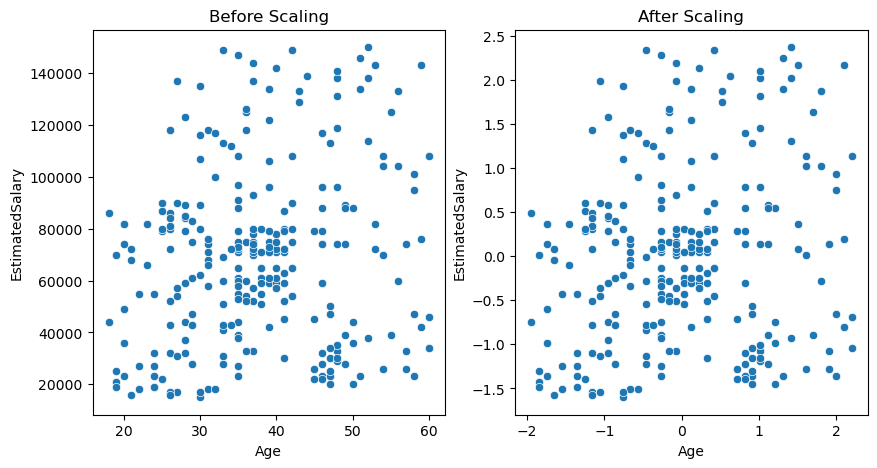

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(X_train['Age'],X_train['EstimatedSalary'])
plt.title('Before Scaling')

plt.subplot(1,2,2)
sns.scatterplot(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
plt.title('After Scaling')

Text(0.5, 1.0, 'After Scaling')

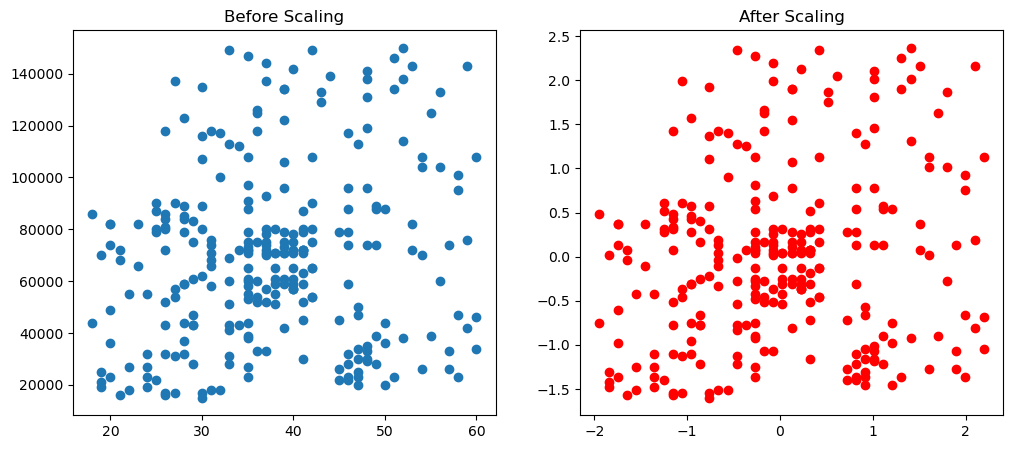

In [24]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')

In [25]:
### Compere it w.r.t pdf

<AxesSubplot:title={'center':'After Scaling'}, xlabel='Age', ylabel='Density'>

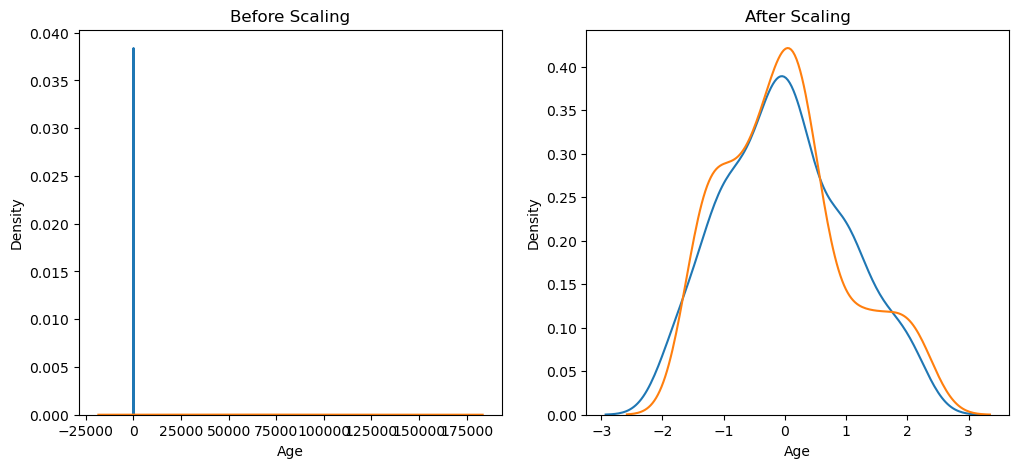

In [26]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(12,5))

#Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

- Here in first figure Vericle('blue line') shows PDF of age as for the rang -25000 to 75000 our age scale is on 20 to 60 so it is only look line straight line  and salary have wide rang so it shows flat line ('orrange line')
- After Scaling
- we can copare scale of both features

In [27]:
#### Comparision w.r.t. Distribution

<AxesSubplot:title={'center':' Age dist. After Scaling'}, xlabel='Age', ylabel='Density'>

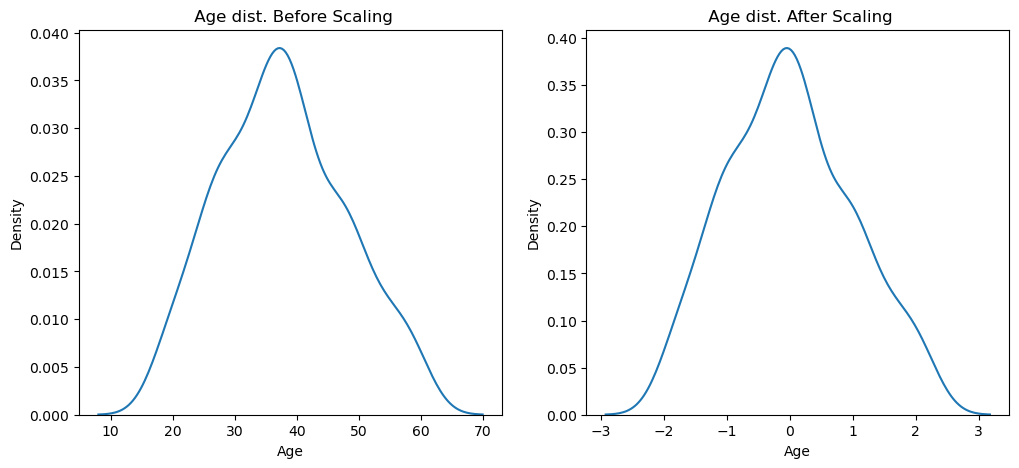

In [28]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(12,5))

#Before Scaling
ax1.set_title(' Age dist. Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

#After scaling
ax2.set_title(' Age dist. After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

<AxesSubplot:title={'center':' Salary dist. After Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

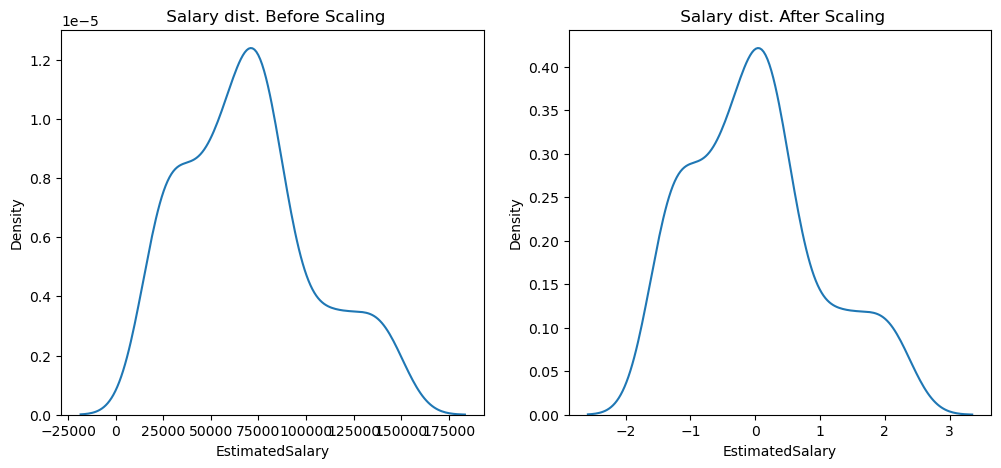

In [29]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(12,5))

#Before Scaling
ax1.set_title(' Salary dist. Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

#After scaling
ax2.set_title(' Salary dist. After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

-  As there is no change is distibution of data in both features before and after scaling. Scaling do not affect data

### Why Scaling is important ?

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [44]:
#Regression on the train data before standardization
lr.fit(X_train,y_train)

#Regression on the train data after Standardization
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [45]:
y_pred= lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6363636363636364
Scaled 0.8712121212121212


In [48]:
## now there are some algorithm which does not have any effect/use of Standardization

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [51]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [52]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [53]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8636363636363636
Scaled 0.8636363636363636


### Effect of Outlier

In [54]:
df = df.append(pd.DataFrame({'Age':[5,90,95],
                             'EstimatedSalary':[1000,250000,350000],
                             'Purchased':[0,1,1]}),ignore_index=True)


C:\Users\Amruta\AppData\Local\Temp\ipykernel_14488\3632906554.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],


In [55]:
df

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
398,36.0,33000.0,0
399,49.0,36000.0,1
400,5.0,1000.0,0
401,90.0,250000.0,1


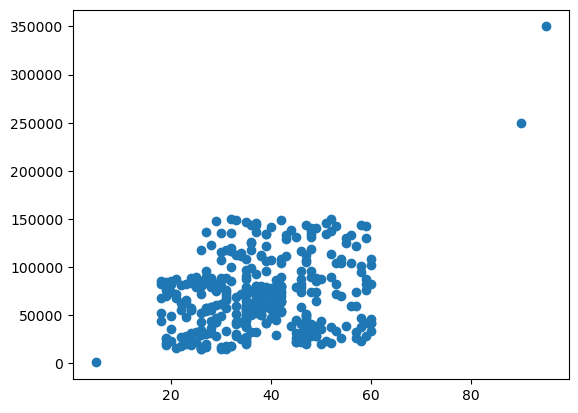

In [56]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [57]:
### lets do all the standerdization

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

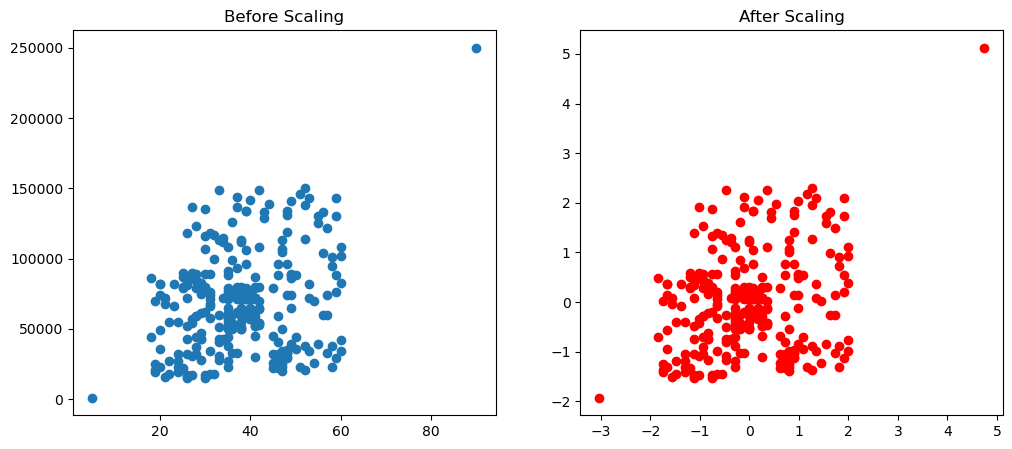

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

- So outlier have behave as oulier even after scaling 